<a href="https://colab.research.google.com/github/harttu/courses/blob/main/DeepLearningWithPytorch/Copy_of_Chapter5_model_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Chapter 5 - From mysterious thermometer readings predict the temperature in celcius



In [77]:
import torch
import pandas as pd

T_c are temperature in Celcius and T_u are temperature in unknown units

In [78]:
t_c = [ 0.5, 14.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0 ]
t_u = [35.7, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4 ]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

Our model: Given a measurement in unknown unit, what is the temperature in Celsius 

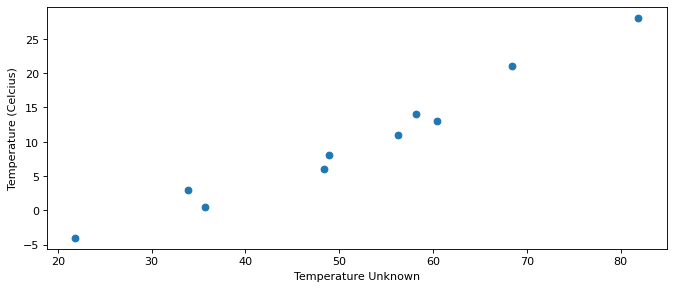

In [84]:
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(10, 4), dpi=80)
plt.ylabel("Temperature (Celcius)")
plt.xlabel("Temperature Unknown")
plt.scatter(t_u.numpy(), t_c.detach().numpy() )

Linear model and mean of squared errors loss function

In [85]:
def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p,t_c):
  return ((t_p - t_c ) ** 2).mean()

init weights

In [87]:
w = torch.ones(())
b = torch.zeros(())
w,b

(tensor(1.), tensor(0.))

In [88]:
t_p = model(t_u,w,b)

Example predictions with init. weights

In [89]:
pd.DataFrame([t_p.numpy(),
              t_c.numpy()], 
             index=["Predicted","Gold (celcius)"])

,0,1,2,3,4,5,6,7,8,9
Predicted,35.700001,58.200001,81.900002,56.299999,48.900002,33.900002,21.799999,48.400002,60.400002,68.400002
Gold (celcius),0.500000,14.000000,28.000000,11.000000,8.000000,3.000000,-4.000000,6.000000,13.000000,21.000000


In [90]:
loss_fn(t_p,t_c)

tensor(1773.4521)

Naivi tapa laskea kulmakerrointa. Ei skaalaudu

In [91]:
delta = 0.1

loss_rate_of_change_w = \
  (loss_fn(model(t_u, w + delta, b), t_c) -
   loss_fn(model(t_u, w - delta, b), t_c)) / ( 2.0 * delta )

In [92]:
learning_rate = 1e-2

w  = w - learning_rate * loss_rate_of_change_w

In [93]:
loss_rate_of_change_b = \
  ( loss_fn( model( t_u, w, b + delta ), t_c ) -
    loss_fn( model( t_u, w, b - delta ), t_c ) ) / (2.0 * delta) 

b = b - learning_rate * loss_rate_of_change_b

In [95]:
t_p = model(t_u,w,b)
loss_fn(t_p,t_c)

tensor(5542710.)

In [105]:
delta = 0.1
learning_rate = 1e-4
t_gold = t_c
w = torch.ones(())
b = torch.zeros(())

for i in range(0,10):
  loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / ( 2.0 * delta )
  loss_rate_of_change_b = \
    ( loss_fn( model( t_u, w, b + delta ), t_c ) - 
      loss_fn( model( t_u, w, b - delta ), t_c ) ) / (2.0 * delta) 
  w = w - learning_rate * loss_rate_of_change_w
  b = b - learning_rate * loss_rate_of_change_b
  t_predicted = w * t_u + b
  print("Iter: {} - w: {} - b:{} - Loss: {}".format(i,w,b,loss_fn(t_predicted, t_gold)))  
  print("  loss_rate_of_change_w:{} - w:{}"
          .format(loss_rate_of_change_w,
                  w))
  print("  loss_rate_of_change_b:{} - b:{}"
          .format(loss_rate_of_change_b,
                  b))

Iter: 0 - w: 0.5487774014472961 - b:-0.008267883211374283 - Loss: 332.139892578125
  loss_rate_of_change_w:4512.22607421875 - w:0.5487774014472961
  loss_rate_of_change_b:82.6788330078125 - b:-0.008267883211374283
Iter: 1 - w: 0.3613702356815338 - b:-0.011896606534719467 - Loss: 83.50257110595703
  loss_rate_of_change_w:1874.0716552734375 - w:0.3613702356815338
  loss_rate_of_change_b:36.2872314453125 - b:-0.011896606534719467
Iter: 2 - w: 0.28353607654571533 - b:-0.013598396442830563 - Loss: 40.60996627807617
  loss_rate_of_change_w:778.341796875 - w:0.28353607654571533
  loss_rate_of_change_b:17.017898559570312 - b:-0.013598396442830563
Iter: 3 - w: 0.25121182203292847 - b:-0.014499860815703869 - Loss: 33.209754943847656
  loss_rate_of_change_w:323.2424011230469 - w:0.25121182203292847
  loss_rate_of_change_b:9.014644622802734 - b:-0.014499860815703869
Iter: 4 - w: 0.23778970539569855 - b:-0.015068916603922844 - Loss: 31.9322509765625
  loss_rate_of_change_w:134.2211151123047 - w:0.2

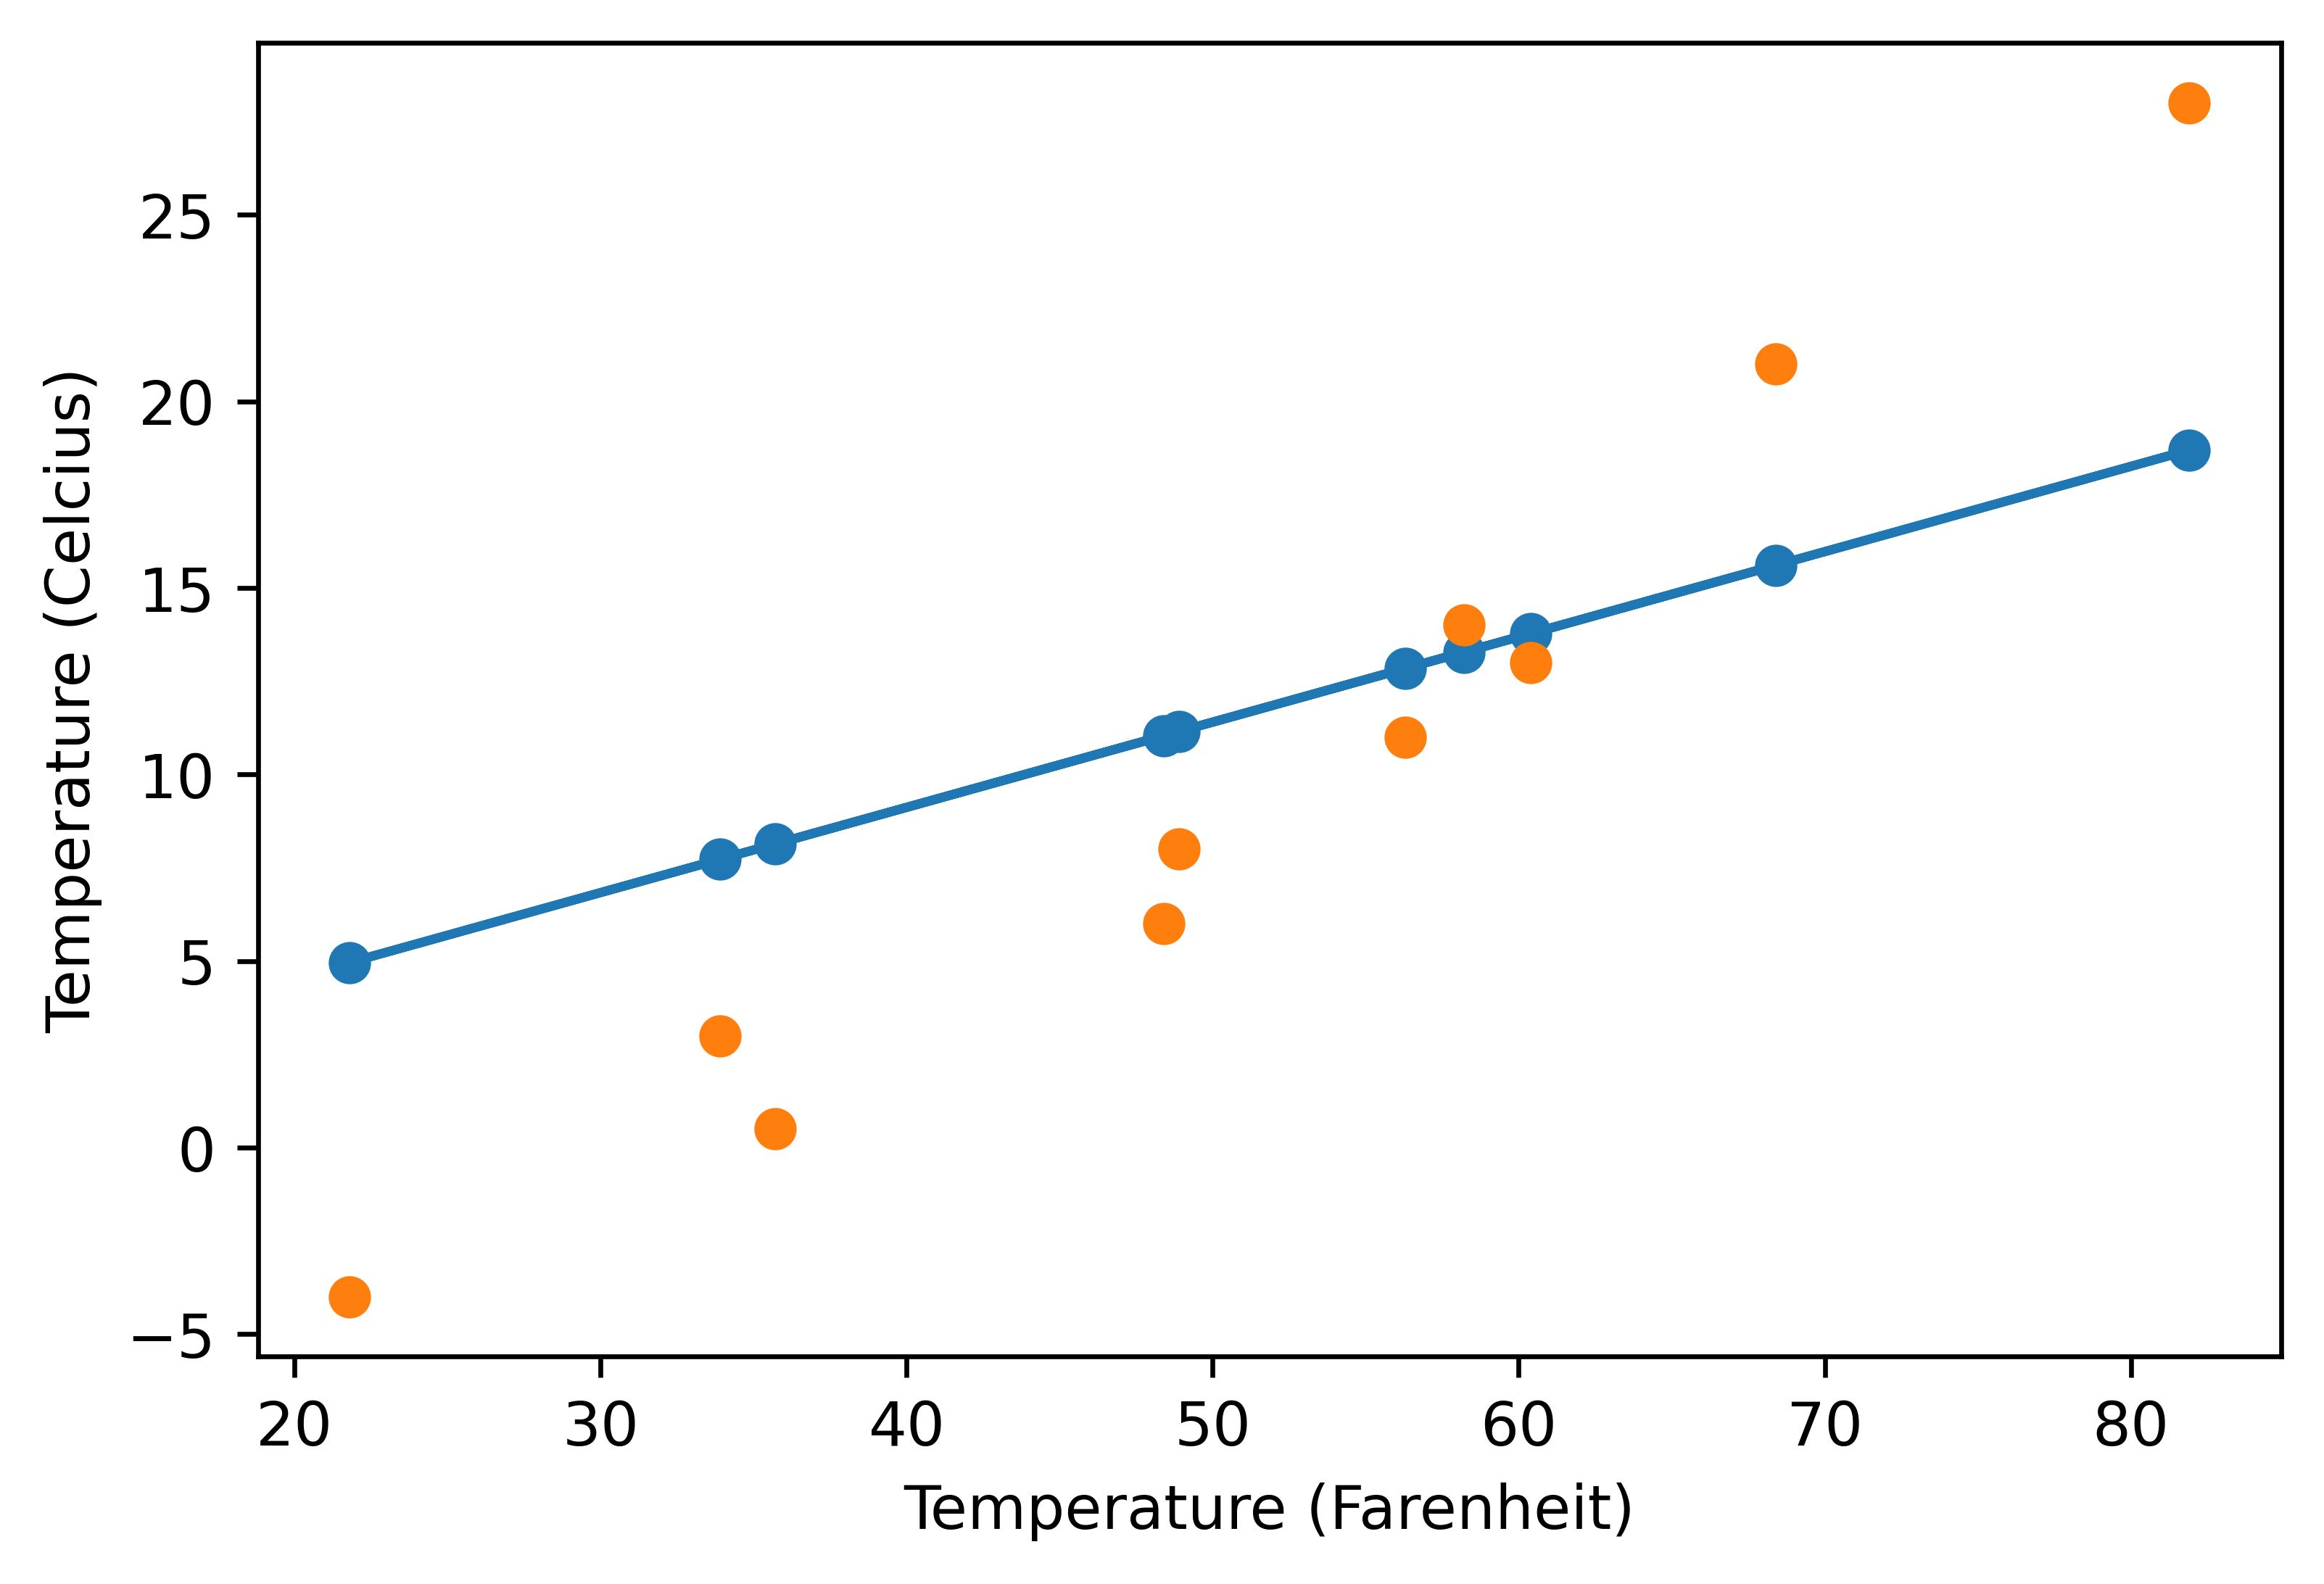

In [106]:
t_p = w * t_u + b

fig = plt.figure(dpi = 600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celcius)")
plt.scatter(t_u.numpy(), t_p.detach().numpy() )
plt.plot(t_u.numpy(), t_p.detach().numpy() )

plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [94]:
w,b

(tensor(-44.1223), tensor(45.5750))

Eli nykyisessä w:n ja b:n ympäristössä, LOSSin arvo muuttuu seuraavissa suhteissa pieniin w:n ja b:n muutoksiin

In [11]:
loss_rate_of_change_w,loss_rate_of_change_b

(tensor(4512.2261), tensor(-4557.5000))

In [12]:
def dloss_fn(t_p,t_c):
  dsquared_diffs = 2 * ( t_p - t_c) / t_p.size(0) # t_p.size(0) -> 10
  return dsquared_diffs

In [13]:
t_p.size(0)

10

In [14]:

def dmodel_dw(t_u,w,b):
  return t_u


def dmodel_db(t_u,w,b):
  return 1


In [15]:
def grad_fn(t_u,t_c,t_p,w,b):
  dloss_dtp = dloss_fn(t_p,t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u,w,b)
  dloss_db = dloss_dtp * dmodel_db(t_u,w,b)
  return torch.stack( [ dloss_dw.sum(), dloss_db.sum() ] )

In [29]:
def training_loop( n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w, b = params
    #print("W:{}, b:{}".format(w,b))
    t_p = model(t_u,w,b) # forward pass
    loss = loss_fn(t_p,t_c)
    grad = grad_fn(t_u,t_c,t_p,w,b) # backward pass

    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print('Epochs %d, Loss %f' % (epoch, float(loss)))

  return params

In [30]:
t_un = 0.1 * t_u

In [54]:
t_c,t_u,t_un

(tensor([ 0.5000, 14.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,  6.0000,
         13.0000, 21.0000]),
 tensor([35.7000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000, 48.4000,
         60.4000, 68.4000]),
 tensor([3.5700, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400, 6.0400,
         6.8400]))

In [33]:
params = training_loop(n_epochs = 5000,
              learning_rate = 1e-2,
              params = torch.tensor([1.0,0.0]),
              t_u = t_un,
              t_c = t_c)

params

Epochs 500, Loss 7.454174
Epochs 1000, Loss 3.585042
Epochs 1500, Loss 2.988752
Epochs 2000, Loss 2.896853
Epochs 2500, Loss 2.882690
Epochs 3000, Loss 2.880507
Epochs 3500, Loss 2.880171
Epochs 4000, Loss 2.880119
Epochs 4500, Loss 2.880111
Epochs 5000, Loss 2.880110


tensor([  5.3224, -17.3019])

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

In [55]:
params

tensor([  5.3224, -17.3019])

In [59]:
w, b = params
t_un[0] * w + b

tensor(1.6992)

In [62]:
t_c, t_p, t_u

(tensor([ 0.5000, 14.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,  6.0000,
         13.0000, 21.0000]),
 tensor([ 1.6992, 13.6747, 26.2889, 12.6635,  8.7249,  0.7412, -5.6990,  8.4587,
         14.8457, 19.1036]),
 tensor([35.7000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000, 48.4000,
         60.4000, 68.4000]))

In [47]:
t_u.numpy(), t_p.numpy()

(array([35.7, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4],
       dtype=float32),
 array([ 1.699234 , 13.674725 , 26.288908 , 12.66346  ,  8.724855 ,
         0.7411938, -5.6989584,  8.458733 , 14.845663 , 19.103613 ],
       dtype=float32))

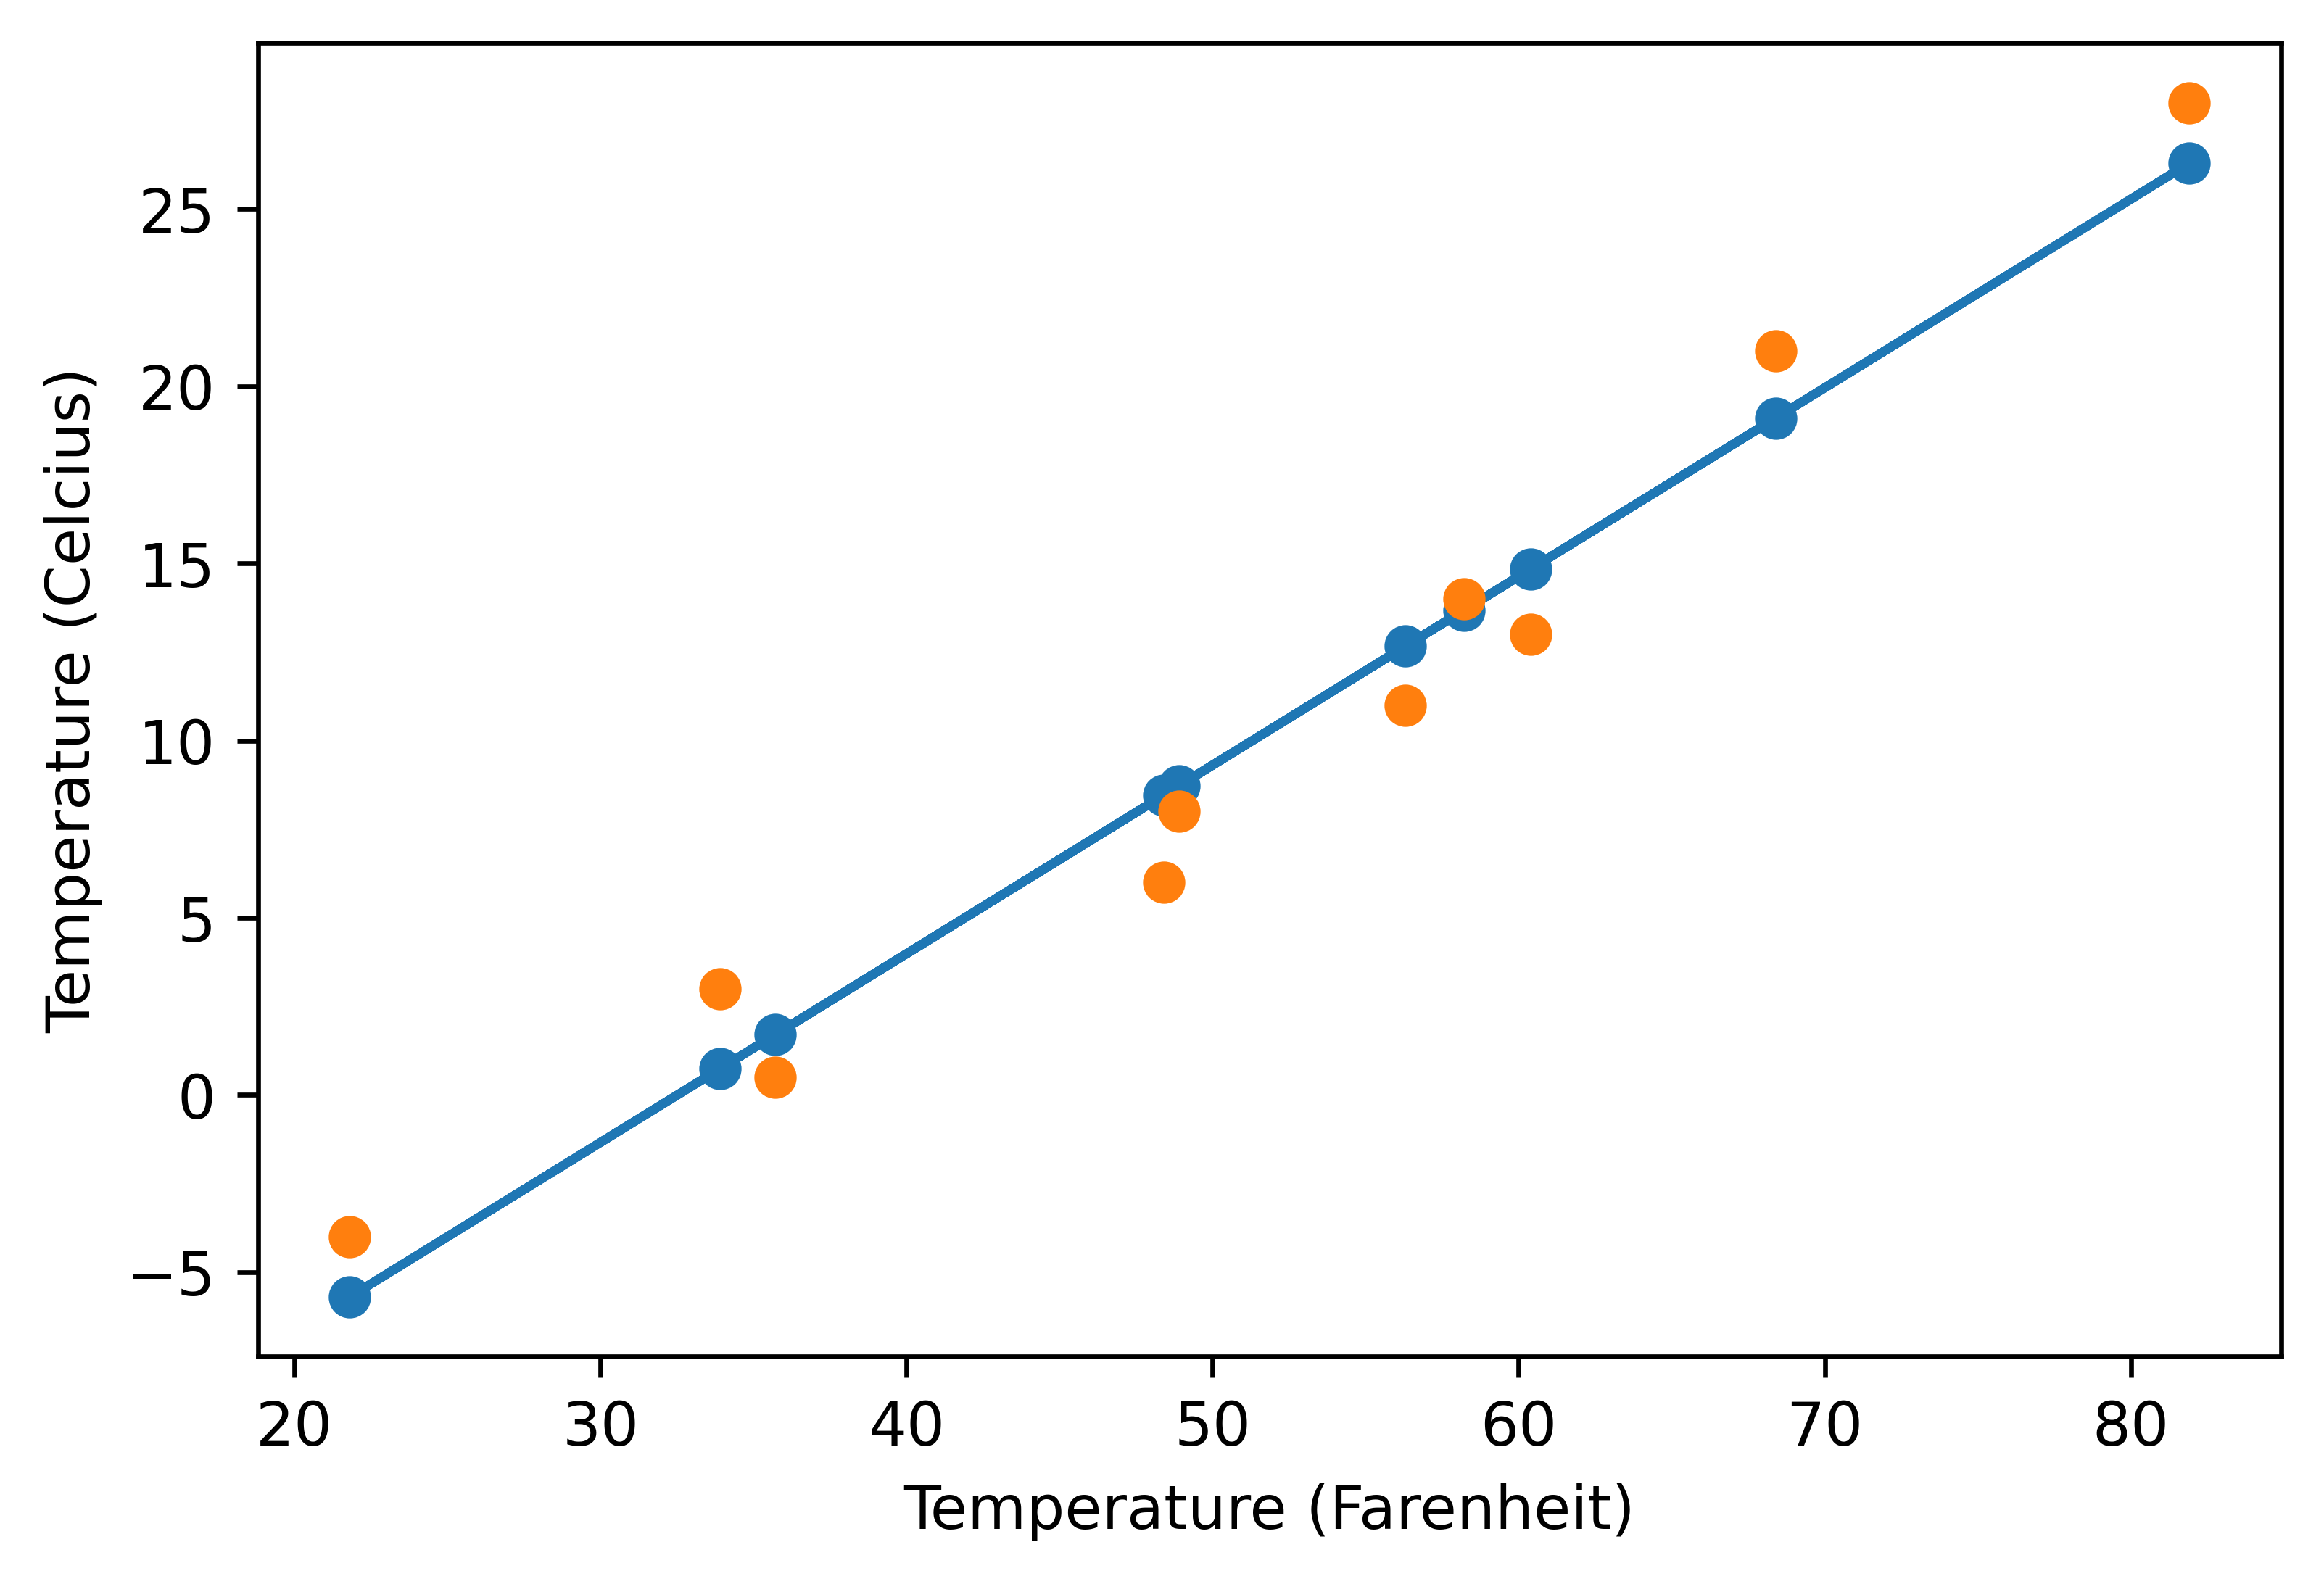

In [52]:
fig = plt.figure(dpi = 600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celcius)")
plt.scatter(t_u.numpy(), t_p.detach().numpy() )
plt.plot(t_u.numpy(), t_p.detach().numpy() )

plt.plot(t_u.numpy(), t_c.numpy(), 'o')